<div align='center'><font size="5" color='#353B47'>COVID19</font></div>
<div align='center'><font size="4" color="#353B47">Visualizations and interactive chloropleth</font></div>
<br>

<hr>

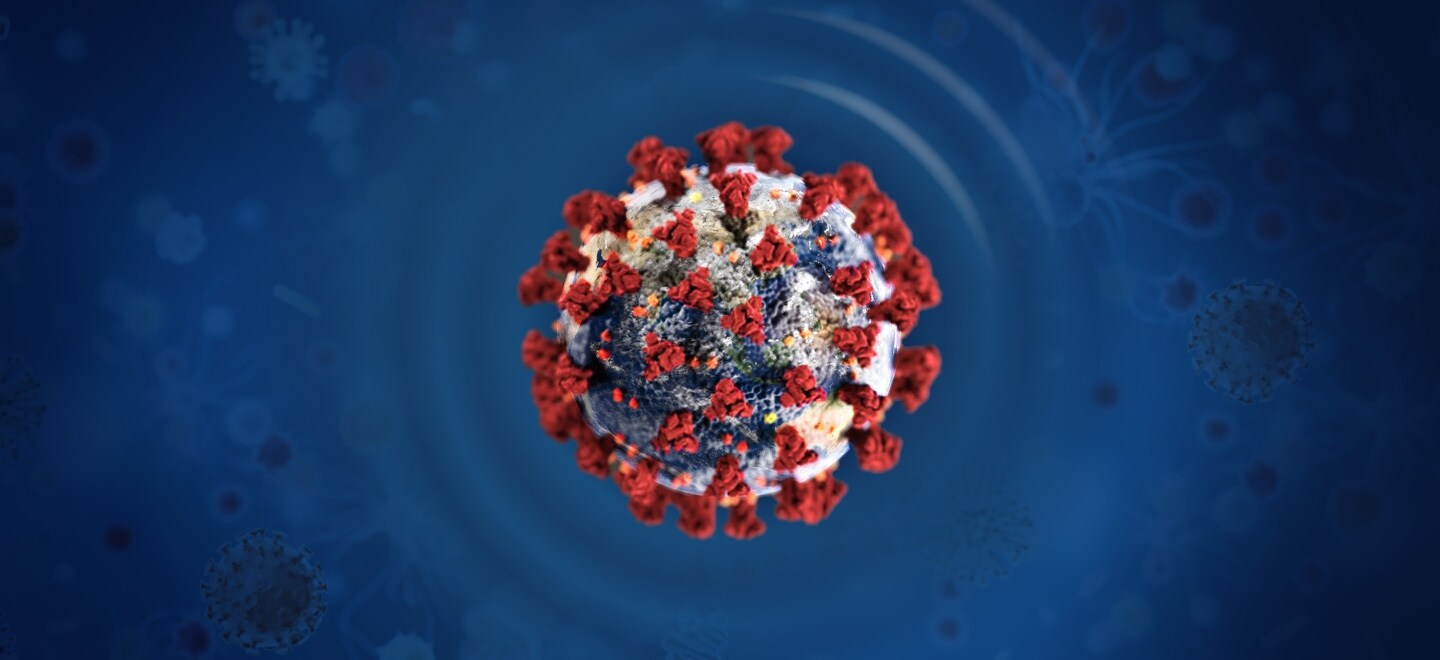

## <div id="summary">Table of contents</div>

**<font size="2"><a href="#chap1">1. Import libraries</a></font>**
**<br><font size="2"><a href="#chap2">2. Overview of the data and small cleaning</a></font>**
**<br><font size="2"><a href="#chap3">3. Confirmed cases and Fatalities</a></font>**
**<br><font size="2"><a href="#chap4">4. Top 5 confirmed cases and fatalities</a></font>**
**<br><font size="2"><a href="#chap5">5. COVID death rate, should we believe it ?</a></font>**

<div align='justify'><font size='3'>Coronavirus disease (COVID-19) is an infectious disease caused by a new virus.
The disease causes respiratory illness (like the flu) with symptoms such as a cough, fever, and in more severe cases, difficulty breathing. You can protect yourself by washing your hands frequently, avoiding touching your face, and avoiding close contact with people who are unwell.
<br><br>
I will try to show throught this notebook some interesting curves on how the virus spread from its origin location (Wuhan) to the world and explain what can be the limit of characterising the violence of the virus only by its death rate. 

# <div id="chap1">Import libraries</div>

In [ ]:
import collections
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

import pycountry
import plotly
import plotly.io as pio
import plotly.express as px

from ipywidgets import interact

# <div id="chap2">Overview of the data and small cleaning</div>

In [ ]:
train = pd.read_csv('/kaggle/input/covid19-global-forecasting-week-1/train.csv')

In [ ]:
train.head()

In [ ]:
print(f'{train.shape[0]} observations and {train.shape[1]} columns')

In [ ]:
train.info()

In [ ]:
# Convert Date column as datetime
train['Date_plotly'] = train['Date']
train['Date'] = pd.to_datetime(train['Date'])

print(f"from {min(train['Date'])} to {max(train['Date'])}")

In [ ]:
# Rename column names
train = train.rename(columns = {'Province/State':'Province_State',
                                'Country/Region':'Country_Region', 
                                'Lat': 'Latitude', 
                                'Long':'Longitude', 
                                'ConfirmedCases': 'Confirmed_Cases'})

In [ ]:
train.isnull().sum()

In [ ]:
# Fill NAs with Country_Region
train['Province_State'] = train['Province_State'].fillna(train['Country_Region'])

<div align='justify'><font size='3'>Let's aggregate the dataframe in order to get the cumulative confirmed cases and fatalities over time per country

In [ ]:
# Create aggregated dataframe
train_agg = train[['Country_Region', 
                   'Date', 
                   'Confirmed_Cases', 
                   'Fatalities']].groupby(['Country_Region', 'Date'], as_index = False).agg({'Confirmed_Cases':'sum', 'Fatalities':'sum'})

# <div id="chap3">Confirmed cases and Fatalities</div>

## China

<div align='justify'><font size='3'>Containment of unaffected people is at the heart of the Chinese response. As soon as an infection zone is established, schools, theatres and restaurants are closed. In the Wuhan region, 15 million healthy people have been forced to stay at home.

In [ ]:
fig = plt.figure(figsize=(15,10))
plt.title('COVID cases evolution in China', fontsize=20)

ax1 = fig.add_subplot(111)
sns.lineplot(x = 'Date', y='Confirmed_Cases', data = train_agg[train_agg['Country_Region'] == 'China'], ax=ax1)
ax1.axvline('2020-02-02', color='red', linestyle='--')

ax2 = ax1.twinx()
sns.lineplot(x = 'Date', y='Fatalities', data = train_agg[train_agg['Country_Region'] == 'China'], color='yellow', ax=ax2)

fig.legend(('Cumulated confirmed cases','Lockdown start date','Cumulated fatalities'),loc="upper right")
ax1.grid()
plt.show()

## Korea

<div align='justify'><font size='3'>Korea is a particular case as it is one of the countries that has been most infected with Covid-19 but also has the lowest mortality rate. The country has contained the epidemic without containment or coercive measures. Another path has been chosen: hygiene, systematic detection of the sick, information and individualized care.

In [ ]:
fig = plt.figure(figsize=(15,10))
plt.title('COVID cases evolution in South Korea', fontsize=20)

ax1 = fig.add_subplot(111)
sns.lineplot(x = 'Date', y='Confirmed_Cases', data = train_agg[train_agg['Country_Region'] == 'Korea, South'], ax=ax1)

ax2 = ax1.twinx()
sns.lineplot(x = 'Date', y='Fatalities', data = train_agg[train_agg['Country_Region'] == 'Korea, South'], color='yellow', ax=ax2)

fig.legend(('Cumulated confirmed cases','Cumulated fatalities'),loc="upper right")
ax1.grid()
plt.show()

## Singapore

<div align='justify'><font size='3'>Singapore is a top-notch health system, draconian tracing and containment measures, and a small population that’s largely accepting of government’s expansive orders. Singapore was aggressive out of the gate and has continued to be. It was one of the first countries to impose restrictions on anyone with recent travel history to China and parts of South Korea. It has a strict hospital and home quarantine regimen for potentially infected patients and is extensively tracing anyone they may have been in contact with.

In [ ]:
fig = plt.figure(figsize=(15,10))
plt.title('COVID cases evolution in Singapore', fontsize=20)

ax1 = fig.add_subplot(111)
sns.lineplot(x = 'Date', y='Confirmed_Cases', data = train_agg[train_agg['Country_Region'] == 'Singapore'], ax=ax1)
ax1.axvline('2020-03-20', color='red', linestyle='--')

ax2 = ax1.twinx()
sns.lineplot(x = 'Date', y='Fatalities', data = train_agg[train_agg['Country_Region'] == 'Singapore'], color='yellow', ax=ax2)

fig.legend(('Cumulated confirmed cases','Lockdown start date','Cumulated fatalities'),loc="upper right")
ax1.grid()
plt.show()

## France

In [ ]:
fig = plt.figure(figsize=(15,10))
plt.title('COVID cases evolution in France', fontsize=20)

ax1 = fig.add_subplot(111)
sns.lineplot(x = 'Date', y='Confirmed_Cases', data = train_agg[train_agg['Country_Region'] == 'France'], ax=ax1)

ax2 = ax1.twinx()
sns.lineplot(x = 'Date', y='Fatalities', data = train_agg[train_agg['Country_Region'] == 'France'], color='yellow', ax=ax2)

fig.legend(('Cumulated confirmed cases','Cumulated fatalities'),loc="upper right")
ax1.grid()
plt.show()

## Italy

<div align='justify'><font size='3'>Why is Italy one of the most affected country in Europe ?
<br><br>
It is essentially in the demographics of Italy that we find an explanation for the fact that it is the second most affected country in the world. Italy has one of the oldest populations in Europe... and even in the world.
47.3 in Italy vs 42.3 in France. More vulnerable to respiratory pathologies, the elderly are more likely to suffer from the complications of such a syndrome.

sources:
* https://www.statista.com/statistics/275395/median-age-of-the-population-in-italy/
* https://www.statista.com/statistics/275391/median-age-of-the-population-in-france/

In [ ]:
fig = plt.figure(figsize=(15,10))
plt.title('COVID cases evolution in Italy', fontsize=20)

ax1 = fig.add_subplot(111)
sns.lineplot(x = 'Date', y='Confirmed_Cases', data = train_agg[train_agg['Country_Region'] == 'Italy'], ax=ax1)
ax1.axvline('2020-03-08', color='red', linestyle='--')

ax2 = ax1.twinx()
sns.lineplot(x = 'Date', y='Fatalities', data = train_agg[train_agg['Country_Region'] == 'Italy'], color='yellow', ax=ax2)

fig.legend(('Cumulated confirmed cases','Lockdown start date','Cumulated fatalities'),loc="upper right")
ax1.grid()
plt.show()

## Other countries

In [ ]:
# List of the countries affected by covid during the studied period
countries_with_confirmed_cases = np.ravel(train_agg.loc[:, ['Country_Region','Confirmed_Cases']].groupby(['Country_Region']).sum() == 0)

# Find index of list where value is False
countries_with_confirmed_cases_list = [i for i, value in enumerate(countries_with_confirmed_cases) if value == False] 

# Generate list of countries with at least 1 confirmed case in the study period
confirmed_cases_list = train_agg['Country_Region'].unique()[countries_with_confirmed_cases_list]

In [ ]:
@interact
def confirmed_cases_over_time(country = confirmed_cases_list):
    fig = plt.figure(figsize=(15,10))
    plt.title('COVID cases evolution', fontsize=20)
    
    ax1 = fig.add_subplot(111)
    sns.lineplot(x = 'Date', y='Confirmed_Cases', data = train_agg[train_agg['Country_Region'] == country], ax=ax1)

    ax2 = ax1.twinx()
    sns.lineplot(x = 'Date', y='Fatalities', data = train_agg[train_agg['Country_Region'] == country], color='yellow', ax=ax2)

    fig.legend(('Cumulated confirmed cases','Cumulated fatalities'),loc="upper right")
    ax1.grid()
    plt.show()

## Time series worldmap

In [ ]:
# Date format supported by plotly
train_agg['Date'] = train_agg['Date'].dt.strftime('%Y-%m-%d')

In [ ]:
# Matching function between the ISO code and country names
def fuzzy_search(country):
    try:
        result = pycountry.countries.search_fuzzy(country)
    except Exception:
        return np.nan
    else:
        return result[0].alpha_3

# Manually change name of Korea and Taiwan countries and improve matching
train_agg.loc[train_agg['Country_Region'] == 'Korea, South', 'Country_Region'] = 'Korea, Republic of'
train_agg.loc[train_agg['Country_Region'] == 'Taiwan*', 'Country_Region'] = 'Taiwan'

# ISO mapping for countries in train
iso_map = {country: fuzzy_search(country) for country in train_agg['Country_Region'].unique()}

# Mapping to train
train_agg['iso'] = train_agg['Country_Region'].map(iso_map)

# Many thanks to TeYang Lau for that part

In [ ]:
# Map and find countries without any ISO
train_agg['iso'] = train_agg['Country_Region'].map(iso_map)
train_agg[train_agg['iso'].isna()]['Country_Region'].unique()

In [ ]:
# Use logscale to have better differenciation of colours in the final plot
train_agg['Fatalities_log10']= np.log10(train_agg['Confirmed_Cases']).replace(-np.inf, 0)

In [ ]:
plt.figure(figsize=(15,10))
fig = px.choropleth(train_agg, locations="iso",
                    color="Fatalities_log10",
                    hover_name="Country_Region",
                    animation_frame='Date',
                    color_continuous_scale="Blues")
fig.show()

# <div id="chap4">Top 5 confirmed cases and fatalities</div>

In [ ]:
# Aggregated dataframe sorted by Date
train_agg = train_agg.sort_values(['Date']).reset_index()

In [ ]:
dates = pd.to_datetime(train_agg['Date']).apply(lambda x: x.strftime('%Y-%m-%d')).unique()

<div align='justify'><font size='3'>The following function shows the 5 countries with most confirmed cases and fatalities according to the chosen date

In [ ]:
@interact
def top5(infected = ['Fatalities', 'Confirmed_Cases'] ,date = dates):
    top5_df = train_agg[(train_agg[infected]>0) & (train_agg['Date'] == date)].groupby('Country_Region').max().sort_values([infected], ascending=False)[:5]
    print(top5_df)

# <div id="chap5">COVID death rate, should we believe it ?</div>

In [ ]:
# Define covid death rate
train_agg['Rate'] = np.where(train_agg['Fatalities'] != 0, np.round((train_agg['Fatalities']/train_agg['Confirmed_Cases']),4),0)

<div align='justify'><font size='3'>The following function displays top5 countries which have highest death rate due to COVID

In [ ]:
def top5_covid_death_rate():
    top5_df = train_agg.groupby(['Country_Region']).mean().sort_values(['Rate'], ascending=False)[:5]['Rate']
    print(top5_df)
    
top5_covid_death_rate()

<div align='justify'><font size='3'>Quite clumsy though, here I consider the whole period of study. It it nonsense if the virus hasn't spread yet. Let's fix that.

In [ ]:
countries_with_fatalities = np.ravel(train_agg.loc[:, ['Country_Region','Fatalities']].groupby(['Country_Region']).sum() < 1)
train_agg['Country_Region'] = train_agg['Country_Region'].sort_values()
countries_with_fatalities_list = [i for i, value in enumerate(countries_with_fatalities) if value == False] 
fatalities_list = np.ravel(sorted(train_agg['Country_Region'].unique()))[countries_with_fatalities_list]

In [ ]:
def top5_covid_death_rate_adjusted():
    dicti = {}
    for countries in fatalities_list:
        
        min_day_fatalities = pd.to_datetime(min(train_agg.loc[(train_agg['Country_Region']==countries) & (train_agg['Fatalities']!=0), 'Date']))
        max_day_fatalities = pd.to_datetime(max(train_agg.loc[(train_agg['Country_Region']==countries) & (train_agg['Fatalities']!=0), 'Date']))
        duration = (max_day_fatalities - min_day_fatalities).days
        
        if duration != 0:
            dicti[countries] = sum(train_agg[train_agg['Country_Region']==countries].sort_values(['Rate'], ascending=False)['Rate'])/duration
        else:
            dicti[countries] = 0
    
    # top5 highest rate
    dicti = sorted(dicti.items(), key=lambda elm: elm[1], reverse=True)
    dicti = dict(collections.OrderedDict(dicti))
    
    for i in range(5):
        print(list(dicti.keys())[i], list(dicti.values())[i])

top5_covid_death_rate_adjusted()

<div align='justify'><font size='3'>Turns out that Sudan have highest death rate

In [ ]:
train_agg.groupby(['Country_Region']).std().sort_values(['Rate'], ascending=False)[:5]['Rate']

<div align='justify'><font size='3'>Why rate should not be taken for granted ?
<br><br>
There is selection bias in the data. If a large population of people who, if gotten a test, would have tested negative, decide not to get tests, then their data goes dark. The confirmed cases in datasets released by governments and academic institutions are only from people who voluntarily go to them to be tested. People in the confirmed cases data are more likely to be at risk of death from the coronavirus because the death rate is calculated as the number of people who die from the coronavirus over the number of confirmed cases, the death rate is a lot higher than it actually is because the number of confirmed cases is biased.
<br><br>
However, In the US, many of the cases are not declared as it costs a lot of money to get tested. the death rate is biased and likely underestimated.

<hr>
<br>
<div align='justify'><font color="#353B47" size="4">Thank you for taking the time to read this notebook. I hope that I was able to answer your questions or your curiosity and that it was quite understandable. <u>any constructive comments are welcome</u>. They help me progress and motivate me to share better quality content. I am above all a passionate person who tries to advance my knowledge but also that of others. If you liked it, feel free to <u>upvote and share my work.</u> </font></div>
<br>
<div align='center'><font color="#353B47" size="3">Thank you and may passion guide you.</font></div>